<a href="https://colab.research.google.com/github/maushamkumar/Deep-learning-/blob/main/Weight_initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-Weight initialization

* In the First case we'll use relu as an activation function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/ushape.csv')

In [3]:
df.head()

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0


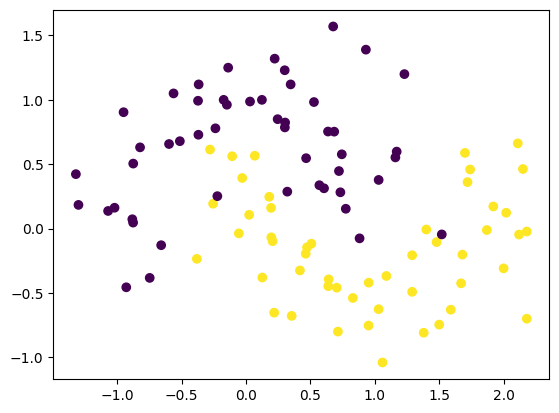

In [4]:
plt.scatter(df['X'], df['Y'], c=df['class'])

In [5]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, -1].values

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Dense


In [8]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                30        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# Set parameters to 0
model.get_weights()

[array([[ 0.5333938 , -0.6184841 ,  0.3545434 ,  0.21709102,  0.33148962,
          0.09985816, -0.46957472,  0.08704603,  0.3146419 ,  0.3145643 ],
        [ 0.2599193 ,  0.39226085,  0.24663746, -0.6248537 ,  0.49834603,
          0.3819664 , -0.6544881 , -0.30259615,  0.5229265 ,  0.5024107 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 1.19650960e-02],
        [-7.16629684e-01],
        [-5.98900557e-01],
        [ 5.45862615e-01],
        [ 1.15156174e-04],
        [-4.49519187e-01],
        [-5.21317542e-01],
        [ 6.35383189e-01],
        [ 8.59583020e-02],
        [ 1.47016943e-01]], dtype=float32),
 array([0.], dtype=float32)]

In [10]:
initial_weights = model.get_weights()

In [12]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)


In [13]:
model.set_weights(initial_weights)

In [14]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
history = model.fit(X,y,epochs=100, validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 119ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 17ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 7.7125 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [17]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

Here you can after training our model the weight still zero

9600/9600 [==============================] - 12s 1ms/step


<Axes: >

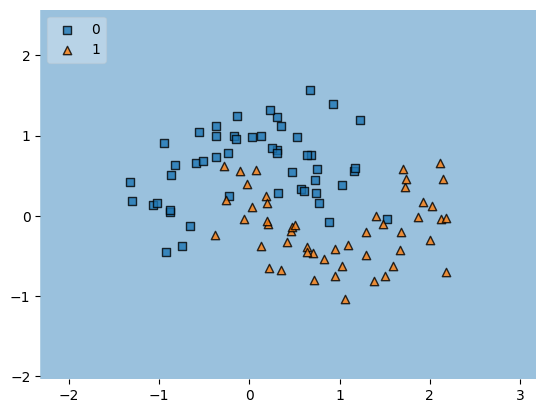

In [18]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

### Train our model using Tanh as an activation function

In [19]:
model = Sequential()

model.add(Dense(10,activation='tanh',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                30        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Set parameters to 0
model.get_weights()

[array([[-0.5228236 ,  0.24087983,  0.43183082,  0.26655602, -0.64085853,
         -0.6782731 ,  0.22461873, -0.65507394, -0.6962841 , -0.60484535],
        [ 0.3997652 ,  0.70668036,  0.3335331 , -0.54560137, -0.19680572,
         -0.25995266,  0.49836558,  0.30732757, -0.7031131 ,  0.19595724]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.0672996 ],
        [ 0.01031905],
        [-0.30455768],
        [ 0.6234308 ],
        [ 0.26977605],
        [ 0.58535546],
        [-0.69846964],
        [ 0.24158412],
        [-0.1420396 ],
        [ 0.31658965]], dtype=float32),
 array([0.], dtype=float32)]

In [21]:
initial_weights = model.get_weights()

In [22]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [23]:
model.set_weights(initial_weights)

In [24]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [25]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 187ms/step - loss: 0.6932 - accuracy: 0.4500 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 31ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 22ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 33ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [27]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.0029357], dtype=float32)]

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

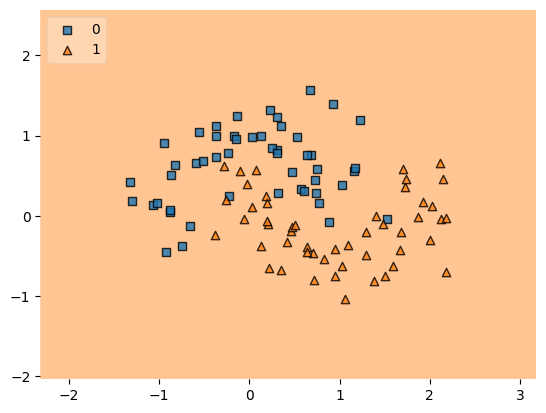

In [28]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

### Let's do for Sigmoid

In [29]:
model = Sequential()

model.add(Dense(10,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                30        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Set parameters to 0
model.get_weights()

[array([[ 0.67478126,  0.6512696 ,  0.26536041, -0.2711809 ,  0.48921746,
          0.4618978 ,  0.34846777,  0.09960532,  0.40982264, -0.43709433],
        [ 0.4883061 ,  0.21578711, -0.22099075, -0.20863551,  0.32071048,
         -0.50536025,  0.06258821, -0.20452619, -0.32242575,  0.11874264]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.45766026],
        [-0.34406772],
        [-0.0643391 ],
        [-0.01053476],
        [-0.4177419 ],
        [ 0.1058746 ],
        [-0.3894061 ],
        [ 0.00096089],
        [ 0.5059181 ],
        [-0.116166  ]], dtype=float32),
 array([0.], dtype=float32)]

In [31]:
initial_weights = model.get_weights()

In [32]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [33]:
model.set_weights(initial_weights)

In [34]:
model.get_weights()

[array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [35]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 144ms/step - loss: 0.6934 - accuracy: 0.4250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 24ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [37]:
model.get_weights()

[array([[ 0.43853644,  0.43853644,  0.43853644,  0.43853644,  0.43853644,
          0.43853644,  0.43853644,  0.43853644,  0.43853644,  0.43853644],
        [-0.47230875, -0.47230875, -0.47230875, -0.47230875, -0.47230875,
         -0.47230875, -0.47230875, -0.47230875, -0.47230875, -0.47230875]],
       dtype=float32),
 array([-0.12835425, -0.12835425, -0.12835425, -0.12835425, -0.12835425,
        -0.12835425, -0.12835425, -0.12835425, -0.12835425, -0.12835425],
       dtype=float32),
 array([[0.05805845],
        [0.05805845],
        [0.05805845],
        [0.05805845],
        [0.05805845],
        [0.05805845],
        [0.05805845],
        [0.05805845],
        [0.05805845],
        [0.05805845]], dtype=float32),
 array([-0.06378681], dtype=float32)]

9600/9600 [==============================] - 13s 1ms/step


<Axes: >

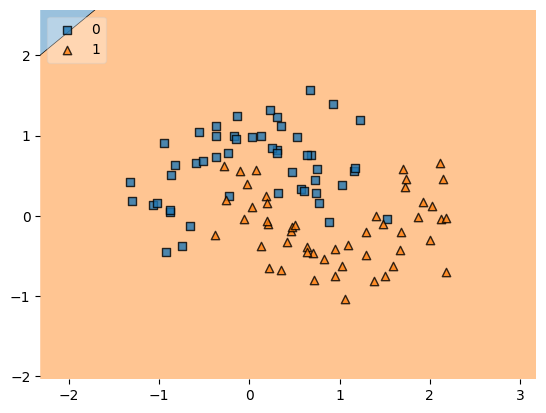

In [38]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

# Instead of zero we'll use 0.5 for initial weights

If you want you can use other activations to confirm it.

I'm using relu as an activation function.

In [40]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                30        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
# Set parameters to 0
model.get_weights()

[array([[-0.20027506,  0.67983896, -0.3476343 , -0.47091955,  0.61980385,
         -0.6150279 ,  0.4156254 , -0.058869  , -0.4716664 ,  0.6225932 ],
        [ 0.08055729, -0.2769707 , -0.10434377,  0.4034049 , -0.0760594 ,
          0.16907257,  0.01382554, -0.07508868,  0.33453554, -0.47578228]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.40836012],
        [ 0.6460033 ],
        [-0.71762013],
        [-0.1144703 ],
        [ 0.15149581],
        [-0.6054692 ],
        [ 0.1774289 ],
        [-0.6456044 ],
        [-0.52906454],
        [ 0.7309844 ]], dtype=float32),
 array([0.], dtype=float32)]

In [42]:
initial_weights = model.get_weights()

In [43]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [44]:
model.set_weights(initial_weights)

In [45]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]], dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [46]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 1s 152ms/step - loss: 2.5194 - accuracy: 0.5000 - val_loss: 1.8238 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 44ms/step - loss: 2.4919 - accuracy: 0.5000 - val_loss: 1.8054 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 76ms/step - loss: 2.4625 - accuracy: 0.5000 - val_loss: 1.7875 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 69ms/step - loss: 2.4405 - accuracy: 0.5000 - val_loss: 1.7696 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 36ms/step - loss: 2.4129 - accuracy: 0.5000 - val_loss: 1.7521 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 2.3860 - accuracy: 0.5000 - val_loss: 1.7348 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 2.3618 - accuracy: 0.5000 - val_loss: 1.7176 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [48]:
model.get_weights()

[array([[0.31041804, 0.31041804, 0.31041804, 0.31041804, 0.31041804,
         0.31041804, 0.31041804, 0.31041804, 0.31041804, 0.31041804],
        [0.25299054, 0.25299054, 0.25299054, 0.25299054, 0.25299054,
         0.25299054, 0.25299054, 0.25299054, 0.25299054, 0.25299054]],
       dtype=float32),
 array([0.26898256, 0.26898256, 0.26898256, 0.26898256, 0.26898256,
        0.26898256, 0.26898256, 0.26898256, 0.26898256, 0.26898256],
       dtype=float32),
 array([[0.26264915],
        [0.26264915],
        [0.26264915],
        [0.26264915],
        [0.26264915],
        [0.26264915],
        [0.26264915],
        [0.26264915],
        [0.26264915],
        [0.26264915]], dtype=float32),
 array([0.22949539], dtype=float32)]

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

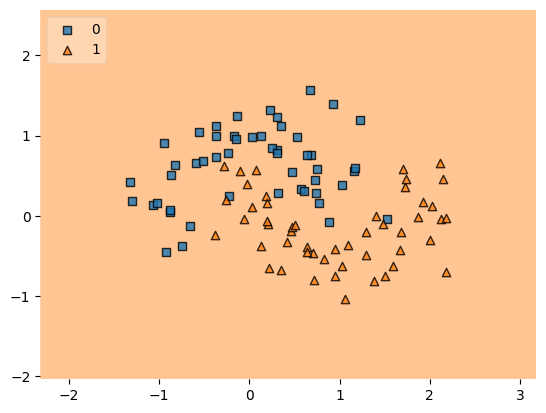

In [49]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)